In [1]:
# Importing the libraries
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Defining functions to calculate S1 and S2 of RK-2 method

def constrained_equations(lambda_, m, omega): # Takes input for parameters 
    
    def S2(tau, x, h, n): # Calculates S2 of RK-2 method for given system
        
        def S1(tau, x, n): # Calculates S1 of RK-2 method for given system
            return np.array([lambda_*(x[1]/m), -lambda_*m*(omega**2)*x[0], lambda_, 0]).reshape(n, )
        
        return S1((tau + 0.5*h), (x + (0.5*h*S1(tau, x, n))), n)

    return S2

In [3]:
# tau -> arbitrary parameter
# tau_0 -> initial value of the arbitrary parameter
# x0 -> array of initial values corresonding to x, Px, t, Pt respectively
# h -> Step size for RK-2 method
# N -> Number of time to run the RK-2 method
# n -> Number of coupled ODEs in given system
# F -> Corresponds to S2 of RK-2 method

# This function returns a matrix which contains all values of x, Px, t, Pt as we vary tau 

def RK2_gen(F, tau_0, x0, h, N, n):
    
    x_vals = np.zeros((x0.shape[0], N)) # Matrix containing all values of x, Px, t, Pt as tau varies
    tau_vals = np.zeros((N, )) # Array of all values of tau
    x_vals[:, 0] = x0
    tau_vals[0] = tau_0
    
    for i in range(1, N):
        x_vals[:, i] = x_vals[:, i-1] + (h*F(tau_vals[i-1], x_vals[:, i-1], h, n)) 
    
    return x_vals

In [4]:
tau_0 = 0
b = 500
x0 = np.array([2.5, 0, 0, 1.5])
h = 1e-3
N = int((b-tau_0)/h)
m = 1 # Mass of the particle
lambda_ = 0.1 # Constant of the constrained motion
omega = 2*np.pi # Angular frequency of the Harmonic Oscillator

In [5]:
tau_arr = np.array([tau_0 + i*h for i in range(N)])

# Numerical solution:
x_num = RK2_gen(constrained_equations(lambda_, m, omega), tau_0, x0, h, N, x0.shape[0])

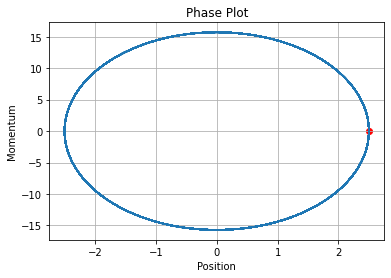

In [6]:
plt.plot(x_num[0, :], x_num[1, :]) 
plt.scatter(x0[0], x0[1], color = "red") # Initial phase
plt.grid()
plt.title("Phase Plot")
plt.xlabel("Position")
plt.ylabel("Momentum")
plt.show()

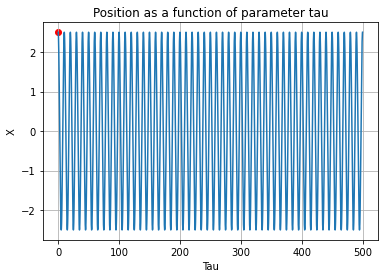

In [7]:
plt.plot(tau_arr, x_num[0, :]) 
plt.grid()
plt.scatter(tau_0, x0[0], color = "red") # Initial position
plt.title("Position as a function of parameter tau")
plt.xlabel("Tau")
plt.ylabel("X")
plt.show()

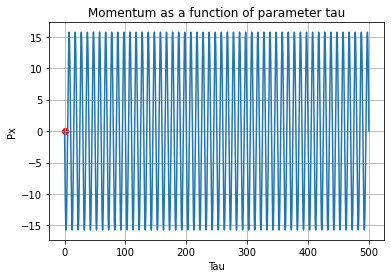

In [8]:
plt.plot(tau_arr, x_num[1, :]) 
plt.grid()
plt.scatter(tau_0, x0[1], color = "red") # Initial momentum
plt.title("Momentum as a function of parameter tau")
plt.xlabel("Tau")
plt.ylabel("Px")
plt.show()

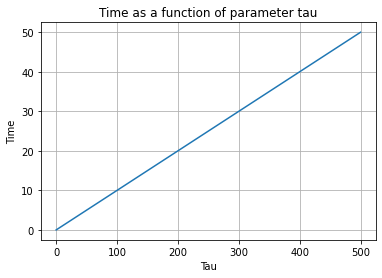

In [9]:
plt.plot(tau_arr, x_num[2, :])
plt.grid()
plt.title("Time as a function of parameter tau")
plt.xlabel("Tau")
plt.ylabel("Time")
plt.show()

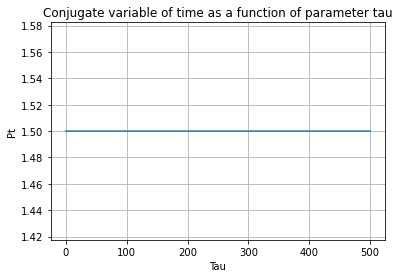

In [10]:
plt.plot(tau_arr, x_num[3, :]) 
plt.grid()
plt.title("Conjugate variable of time as a function of parameter tau")
plt.xlabel("Tau")
plt.ylabel("Pt")
plt.show()

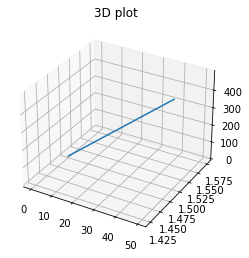

In [12]:
from mpl_toolkits import mplot3d
fig = plt.figure()
 
ax = plt.axes(projection ='3d')
ax.plot3D(x_num[2, :], x_num[3, :], tau_arr)
ax.set_title('3D plot')
plt.show()